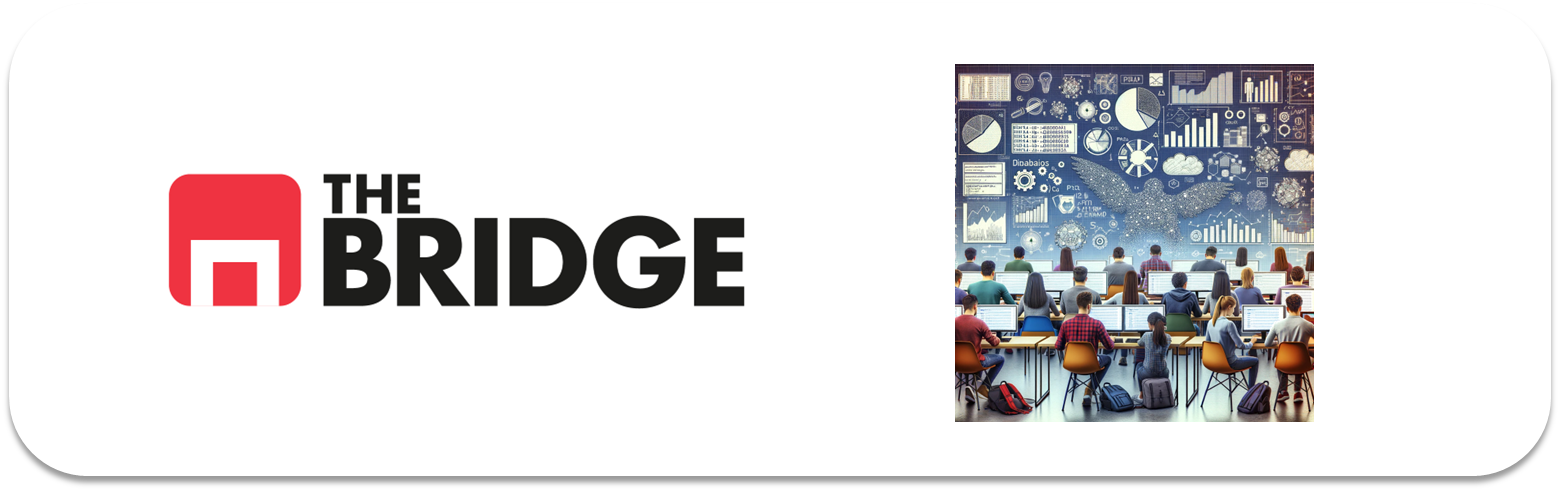

## PRACTICA OBLIGATORIA: **Estadistica Inferencial y Probabilidad**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random 
import bootcampviztools as viztools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from statsmodels.stats.proportion import proportions_ztest

df_titanic = pd.read_csv("./data/titanic.csv")

In [32]:
df_titanic.head(10)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.000000,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.000000,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.000000,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.000000,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.000000,0,0,8.0500,Third,man,True,Southampton,no,True
5,male,33.173123,0,0,8.4583,Third,man,True,Queenstown,no,True
6,male,54.000000,0,0,51.8625,First,man,True,Southampton,no,True
7,male,2.000000,3,1,21.0750,Third,child,False,Southampton,no,False
8,female,27.000000,0,2,11.1333,Third,woman,False,Southampton,yes,False
9,female,14.000000,1,0,30.0708,Second,child,False,Cherbourg,yes,False


## #1 Titanic

Carga el dataset del titanic, y contesta a las siguientes preguntas:

1. ¿Cuál es la probabilidad de superviviencia de un niño?
2. ¿Cuál es la probabilidad de que una mujer viajase sola?
3. ¿Cuál es la probabilidad de sobreviviese un hombre entre 30 y 40 años que embarcó en Southampton y no tuvo que pagar billete?
4. ¿Y si hubiera acompañado de 2 familiares?
5. Si consideramos ahora que queremos tener cierta confianza estadística en nuestras probabilidades (ten en cuenta que estamos extrapolando los ratios de una muestra), cuál sería el rango de probabilidades de sobrevivir de una persona que viajase sola al 95%
7. EXTRA: Y si además el pasajero de 5 fuera un pasajero de tercera o de segunda.

In [33]:
# PROBABILIDAD SUPERVIVENCIA NIÑO 

df_child = df_titanic[df_titanic['who'] == 'child']
num_casos_favorables_ninos = len(df_child.loc[df_child.alive == "yes"])
num_casos_posibles_ninos = len(df_child)
p_superviviencia_ninos = round(num_casos_favorables_ninos / num_casos_posibles_ninos, 2)
print("Probabilidad de supervivencia para los niños:", p_superviviencia_ninos)



Probabilidad de supervivencia para los niños: 0.59


In [34]:
es_child = df_titanic.who == "child"
sobrevive = df_titanic.alive == 'yes'
casos_favorables = len(df_titanic[es_child & sobrevive])
casos_totales = len(df_titanic[es_child])
print("p_practica =", casos_favorables/casos_totales)

p_practica = 0.5903614457831325


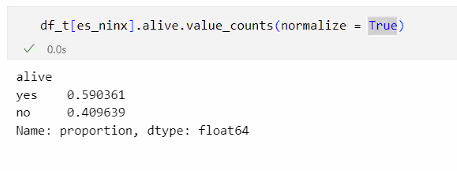

In [35]:
# PROBABILIDAD QUE UNA MUJER VIAJARA SOLA 

df_women = df_titanic[df_titanic['who'] == 'woman']


num_casos_favorables = len(df_women[df_women['alone']])
num_casos_posibles = len(df_women)

p_mujer_viajaba_sola = round(num_casos_favorables / num_casos_posibles, 2)

print("Probabilidad de que una mujer viajara sola:", p_mujer_viajaba_sola)



Probabilidad de que una mujer viajara sola: 0.45


In [36]:
ser_mujer = df_titanic.who == "woman"
sola = df_titanic.alone 

casos_favorables = len(df_titanic[ser_mujer & sola])
casos_totales = len (df_titanic[ser_mujer])

print("Pobabilidad = ", casos_favorables/casos_totales)

Pobabilidad =  0.44649446494464945


In [37]:
# Probabilidad de una persona que viaje sola sea mujer
casos_favorables = len(df_titanic[ser_mujer & sola])
casos_totales = len(df_titanic[sola])
print("Pobabilidad = ", casos_favorables/casos_totales)

Pobabilidad =  0.22532588454376165


In [38]:
# probabilidad de sobreviviese un hombre entre 30 y 40 años que embarcó en Southampton y no tuvo que pagar billete

filtro_fav = (
    (df_titanic['alive'] == 'yes') &
    (df_titanic['who'] == 'man') &
    (df_titanic['age'] >= 30) &
    (df_titanic['age'] <= 40) &
    (df_titanic['embark_town'] == 'Southampton') &
    (df_titanic['fare'] == 0) 
)
filtro_pos = (
    (df_titanic['who'] == 'man') &
    (df_titanic['age'] >= 30) &
    (df_titanic['age'] <= 40) &
    (df_titanic['embark_town'] == 'Southampton') &
    (df_titanic['fare'] == 0) 
)

num_casos_favorables = len(df_titanic[filtro_fav])
num_casos_posibles = len(df_titanic[filtro_pos])

p_sobrevivencia_hombres_30_40_southampton_sin_pago = round(num_casos_favorables / num_casos_posibles, 2)

print("Probabilidad de que sobreviviese un hombre entre 30 y 40 años, que embarcó en Southampton y no pagó billete:", p_sobrevivencia_hombres_30_40_southampton_sin_pago)


Probabilidad de que sobreviviese un hombre entre 30 y 40 años, que embarcó en Southampton y no pagó billete: 0.0


In [39]:
# SOL CLASE
ser_hombre = df_titanic.who == 'man'
edad = df_titanic.age.between(30,40)
embark = df_titanic.embark_town == 'Southampton'
no_paga = df_titanic.fare == 0
# sobrevive

casos_favorables = len(df_titanic[ser_hombre & edad & embark & no_paga & sobrevive])
casos_totales = len(df_titanic[ser_hombre & edad & embark & no_paga])
print("Probabilidad = ", casos_favorables/casos_totales)

Probabilidad =  0.0


Si hubiera ido acompañado, también sería 0, porque solo se incluiría una condición más a los "casos favorables", pero seguirían siendo 0. 

In [40]:
# CONFIANZA ESTADÍSTICA

p_muestra = len(df_titanic[sola & sobrevive])/len(df_titanic[sola])
print(p_muestra)

0.30353817504655495


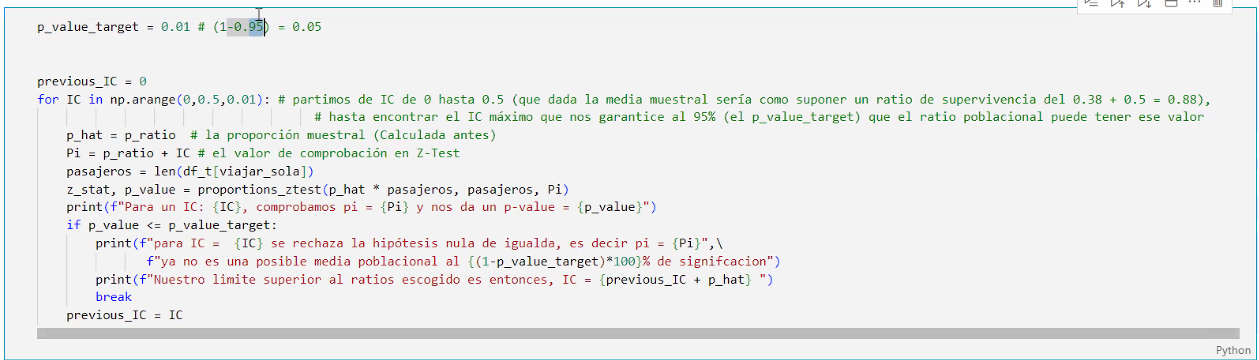

In [50]:
p_value_target = 0.05 # (1 - 0.95)

previous_IC = 0
for IC in np.arange (0,0.5,0.005): 
    p_hat = p_muestra
    Pi = p_muestra + IC
    pasajeros = len(df_titanic[sola])
    z_stat, p_value = proportions_ztest(p_hat * pasajeros, pasajeros, Pi)
    print(F'Para un IC:{IC}, comprobamos pi= {Pi} y nos da un p-value = {p_value} ')
    if p_value <= p_value_target: 
        print(f'Para IC = {IC} se rechaza la hipótesis nula de igualdad, es decir pi = {Pi}',\
            f'ya no es una posible media poblacional al {(1-p_value_target)*100}% de significación')
        print(f'Nuestro límite superior al ratio escogido es entonces, IC = {previous_IC + p_hat}')
        break
    previous_IC = IC

Para un IC:0.0, comprobamos pi= 0.30353817504655495 y nos da un p-value = 1.0 
Para un IC:0.005, comprobamos pi= 0.30853817504655495 y nos da un p-value = 0.8010404857675425 
Para un IC:0.01, comprobamos pi= 0.31353817504655496 y nos da un p-value = 0.6142603259559789 
Para un IC:0.015, comprobamos pi= 0.31853817504655496 y nos da un p-value = 0.44964785059920354 
Para un IC:0.02, comprobamos pi= 0.32353817504655497 y nos da un p-value = 0.31345302619105286 
Para un IC:0.025, comprobamos pi= 0.32853817504655497 y nos da un p-value = 0.20766801337594198 
Para un IC:0.03, comprobamos pi= 0.3335381750465549 y nos da un p-value = 0.1305327210750396 
Para un IC:0.035, comprobamos pi= 0.3385381750465549 y nos da un p-value = 0.07773109785483208 
Para un IC:0.04, comprobamos pi= 0.34353817504655493 y nos da un p-value = 0.0437993502022194 
Para IC = 0.04 se rechaza la hipótesis nula de igualdad, es decir pi = 0.34353817504655493 ya no es una posible media poblacional al 95.0% de significación

In [51]:
print(f'El IC es {p_muestra - 0.035} - {p_muestra + 0.035}')

El IC es 0.26853817504655497 - 0.3385381750465549


## #2 Life Satisfaction

Carga el dataset de satifacción vital y contesta a las siguietnes preguntas:

1. Podemos asegurar con cierta confianza estadística (del 99%) que la satisfaccion vital media del mundo es menor de 7.
2. ¿Qué nivel de satisfacción media asignaríamos a país con esperanza de vida de más de 65 años y tasa de empleo superior a 60%? (ojo fijate que son umbrales)
3. ¿Cuál sería la probabilidad de tener más de 6 puntos de satisfacción vital para los países con esperanza de vida mayor a 65 años y tasa de empleo superior a 60%?


In [42]:
df_sat = pd.read_csv("./data/lifesat_full.csv")
df_sat.head()

,Country,GDP per capita (USD),Life satisfaction,Life expectancy,Homicide rate,Employment rate
0,South Africa,11466.189672,4.725336,57.5,13.7,43.0
1,Colombia,13441.492952,6.302556,76.2,24.5,67.0
2,Brazil,14063.982505,6.415187,74.8,26.7,61.0
3,Mexico,17887.750736,6.536861,75.4,18.1,61.0
4,Chile,23324.524751,6.538143,79.9,4.2,63.0


In [43]:
# 1. Intervalo de confianza del 99% para la satisfacción vital media del mundo

confianza = 0.99
media_mundo = df_sat['Life satisfaction'].mean()
error_estandar_media = np.std(df_sat['Life satisfaction'], ddof=1) / np.sqrt(len(df_sat))
t_value = np.abs(np.percentile(np.random.standard_t(df=len(df_sat) - 1, size=10000), (1 - confianza / 2) * 100))

intervalo_confianza = (media_mundo - t_value * error_estandar_media, media_mundo + t_value * error_estandar_media)

print(f"1. Intervalo de confianza del {confianza*100}% para la satisfacción vital media del mundo: {intervalo_confianza}")





1. Intervalo de confianza del 99.0% para la satisfacción vital media del mundo: (6.598880697016027, 6.599962106771138)


In [44]:
# 2. Nivel de satisfacción medio para países con esperanza de vida > 65 años y tasa de empleo > 60%
umbrales_esperanza_vida_empleo = (65, 60)
filtro_paises = (df_sat['Life expectancy'] > umbrales_esperanza_vida_empleo[0]) & (df_sat['Employment rate'] > umbrales_esperanza_vida_empleo[1])
nivel_satisfaccion_medio = df_sat.loc[filtro_paises, 'Life satisfaction'].mean()
print(f"2. Nivel de satisfacción medio para países con esperanza de vida > {umbrales_esperanza_vida_empleo[0]} años y tasa de empleo > {umbrales_esperanza_vida_empleo[1]}%: {nivel_satisfaccion_medio:.2f}")


2. Nivel de satisfacción medio para países con esperanza de vida > 65 años y tasa de empleo > 60%: 6.75


In [45]:
# 3. Probabilidad de tener más de 6 puntos de satisfacción vital para países con esperanza de vida > 65 años y tasa de empleo > 60%
umbral_satisfaccion = 6
probabilidad_mas_de_6 = len(df_sat[(df_sat['Life expectancy'] > umbrales_esperanza_vida_empleo[0]) & (df_sat['Employment rate'] > umbrales_esperanza_vida_empleo[1]) & (df_sat['Life satisfaction'] > umbral_satisfaccion)]) / len(df_sat)

print(f"3. Probabilidad de tener más de {umbral_satisfaccion} puntos de satisfacción vital para países con esperanza de vida > {umbrales_esperanza_vida_empleo[0]} años y tasa de empleo > {umbrales_esperanza_vida_empleo[1]}%: {probabilidad_mas_de_6:.2%}")

3. Probabilidad de tener más de 6 puntos de satisfacción vital para países con esperanza de vida > 65 años y tasa de empleo > 60%: 69.44%


## EXTRA: La contrainituividad de la probabilidad

Para poder lidiar con la incertidumbre que nos rodea, **solemos aplicar lo que llamamos nuestro "*sentido común*"**. Por ejemplo, si al levantarnos por la mañana vemos que el día se encuentra nublado, este hecho no nos da la **certeza** de que comenzará a llover más tarde; sin embargo, nuestro *sentido común* puede inducirnos a cambiar nuestros planes y a actuar como si *creyéramos* que fuera a llover si las nubes son los suficientemente oscuras o si escuchamos truenos, ya que nuestra experiencia nos dice que estos signos indicarían una mayor *posibilidad* de que el hecho de que fuera a llover más tarde realmente ocurra. 
Nuestro *sentido común* es algo tan arraigado en nuestro pensamiento, que lo utilizamos automáticamente sin siquiera ponernos a pensar en ello; pero muchas veces, el *sentido común* también nos puede jugar una mala pasada y hacernos elegir una respuesta incorrecta.


#### Situación 1 - La coincidencia de cumpleaños
Vamos a una fiesta a la que concurren un total de 50 personas. Allí un amigo nos desafía afirmando que en la fiesta debe haber por lo menos 2 personas que cumplen años el mismo día y nos apuesta 100 euros a que está en lo correcto. Es decir, que si él acierta deberíamos pagarle los 100 euros; o en caso contrario, el nos pagará los 100 euros. ¿Deberíamos aceptar la apuesta? 


#### Situación 2 - ¿Que puerta elegir? (El dilema de Monty Hall)
Estamos participando en un concurso en el cual se nos ofrece la posibilidad de elegir una entre tres puertas. Tras una de ellas se encuentra una ferrari ultimo modelo, y detrás de las otras dos hay una cabra; luego de elegir una puerta, el presentador del concurso abre una de las puertas restantes y muestra que hay una cabra (el presentador sabe que hay detrás de cada puerta). Luego de hacer esto, el presentador nos ofrece la posibilidad de cambiar nuestra elección inicial y quedarnos con la otra puerta que no habíamos elegido inicialmente. ¿Deberíamos cambiar o confiar en nuestra elección inicial?

¿Qué te diría su *sentido común* que deberían hacer en cada una de estas situaciones?

In [46]:
### SITUACIÓN 1


def simulacion_cumpleanios(num_simulaciones, num_personas):
    exitos = 0

    for i in range(num_simulaciones):
        cumpleanios = set()
        coincidencia = False

        for i in range(num_personas):
            dia_cumpleanios = random.randint(1, 365)

            if dia_cumpleanios in cumpleanios:
                coincidencia = True
                break

            cumpleanios.add(dia_cumpleanios)

        if coincidencia:
            exitos += 1

    probabilidad_exito = exitos / num_simulaciones
    return probabilidad_exito

num_simulaciones = 10000
num_personas = 50

probabilidad_exito = simulacion_cumpleanios(num_simulaciones, num_personas)

print(f"Probabilidad de que al menos dos personas tengan el mismo cumpleaños en un grupo de {num_personas} personas: {probabilidad_exito:.2%}")


Probabilidad de que al menos dos personas tengan el mismo cumpleaños en un grupo de 50 personas: 97.14%


In [47]:
# Simulación de Monty Hall
def simulacion_monty_hall(num_simulaciones):
    cambiar_ganar = 0
    quedarse_ganar = 0

    for _ in range(num_simulaciones):
        # Escoge una puerta al azar
        puerta_ganadora = random.randint(1, 3)

        # Jugador elige una puerta
        eleccion_jugador = random.randint(1, 3)

        # Presentador abre una de las otras puertas con una cabra
        puertas_restantes = [1, 2, 3]
        puertas_restantes.remove(eleccion_jugador)
        if eleccion_jugador == puerta_ganadora:
            puertas_restantes.remove(random.choice(puertas_restantes))
        else:
            puertas_restantes.remove(puerta_ganadora)

        # Jugador decide cambiar de puerta
        eleccion_jugador = puertas_restantes[0]

        # Contar los casos en los que ganamos cambiando o quedándonos
        if eleccion_jugador == puerta_ganadora:
            quedarse_ganar += 1
        else:
            cambiar_ganar += 1

    probabilidad_quedarse = quedarse_ganar / num_simulaciones
    probabilidad_cambiar = cambiar_ganar / num_simulaciones

    return probabilidad_quedarse, probabilidad_cambiar

num_simulaciones = 10000
prob_quedarse, prob_cambiar = simulacion_monty_hall(num_simulaciones)

print(f"Probabilidad de ganar si te quedas con tu elección inicial: {prob_quedarse:.2%}")
print(f"Probabilidad de ganar si cambias de puerta: {prob_cambiar:.2%}")


Probabilidad de ganar si te quedas con tu elección inicial: 0.00%
Probabilidad de ganar si cambias de puerta: 100.00%
